=== Emotion Predictions ===
Sample 1: Predicted - Sad, Actual - Sad
Sample 2: Predicted - Angry, Actual - Angry
Sample 3: Predicted - Happy, Actual - Happy
Sample 4: Predicted - Angry, Actual - Angry
Sample 5: Predicted - Sad, Actual - Sad

=== Classification Report ===
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         2
       Happy       1.00      1.00      1.00         1
         Sad       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



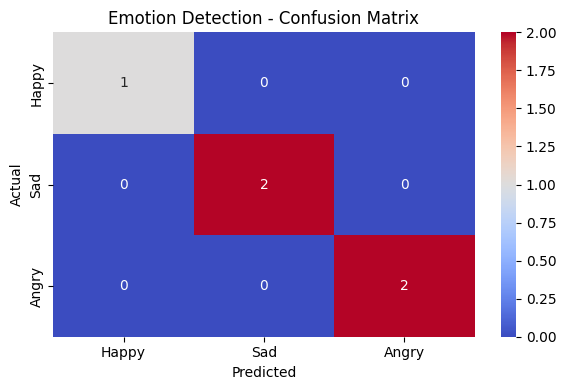

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Function to generate synthetic audio signals
def generate_tone(frequency, duration=2.0, sr=22050):
    t = np.linspace(0, duration, int(sr * duration), False)
    tone = 0.5 * np.sin(2 * np.pi * frequency * t)
    return tone, sr

# 2. Create synthetic dataset
def create_dataset():
    emotions = ['Happy', 'Sad', 'Angry']
    emotion_freqs = {'Happy': 500, 'Sad': 200, 'Angry': 800}
    X = []
    y = []

    for emotion in emotions:
        freq = emotion_freqs[emotion]
        for i in range(5):  # 5 samples per emotion
            audio, sr = generate_tone(freq)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc.T, axis=0)
            X.append(mfcc_mean)
            y.append(emotion)

    return np.array(X), np.array(y)

# 3. Prepare dataset
X, y = create_dataset()

# 4. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = clf.predict(X_test)

print("=== Emotion Predictions ===")
for i, pred in enumerate(y_pred):
    print(f"Sample {i+1}: Predicted - {pred}, Actual - {y_test[i]}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# 7. Confusion Matrix Heatmap
labels = ['Happy', 'Sad', 'Angry']
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title("Emotion Detection - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
